# Домашняя работа 3
## Вариант 4

### ПI.5.11. Постройте наилучшую среднеквадратическую линейную аппроксимацию для функции:
### Г) G(x) = sin(x)
### При x $\in$ $[0, \pi]$

Найдём функцию $f(x) = m \cdot x + p$, являющуюся элеметном наилучшего приближения sin(x) Поскольку все 3 функции $sin(x), x, 1 \in L_2[0, \pi]$, $m$ и $p$ можно найти из системы:

$M \left(\begin{array}{c} 
m\\
p
\end{array}\right) = \left(\begin{array}{c} 
(sinx, x)\\
(sinx, 1)
\end{array}\right) = B$,

Где $M$ - Матрица Грамма Получим её:

(x, x) = $\int_0^\pi x \cdot x dx = \frac{\pi^3}{3}$

(x, 1) = (1, x) = $\int_0^\pi x dx = \frac{\pi \pi}{2}$

(1, 1) = $\int_0^\pi dx = \pi$

(sinx, x) = $\int_0^\pi sinx \cdot x dx = \pi - \int_0^\pi cosx dx = \pi$

(sinx, 1) = $\int_0^\pi sinx dx = 2$

$M = \left(\begin{array}{cc}
        \frac{\pi^3}{3} & \frac{\pi \pi}{2} \\
        \frac{\pi \pi}{2} & \pi
         \end{array} \right)$

         
$M^{-1} = \left(\begin{array}{cc}
        \frac{12}{\pi^3} & \frac{-6}{\pi \pi} \\
        \frac{-6}{\pi \pi} & \frac{4}{\pi}
         \end{array} \right)$

$B = \left(\begin{array}{c}
                 \pi \\
                 2
                 \end{array} \right)$

$\left(\begin{array}{c} 
m\\
p
\end{array}\right) = M^{-1}B = \left( \begin{array}{c}
                                             0 \\
                                             \frac{2}{\pi}
                                             \end{array} \right)$

Приведём для наглядности график:

Text(0, 0.5, 'G(x)')

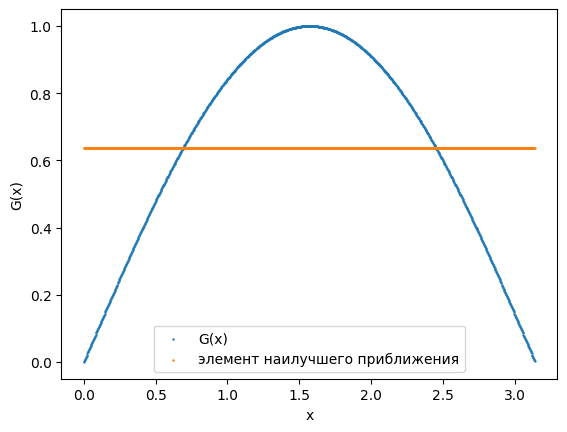

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi
x = [0.001 * pi * i for i in range(1000)]
plt.scatter(
    x, np.sin(x), s = 0.5, label = "G(x)"
)
plt.scatter(
    x, [2 / pi] * len(x), s = 0.5, label = "элемент наилучшего приближения"
)
plt.xlabel('x')
plt.legend()
plt.ylabel('G(x)')

### ПI.5.13

Text(0, 0.5, 'число')

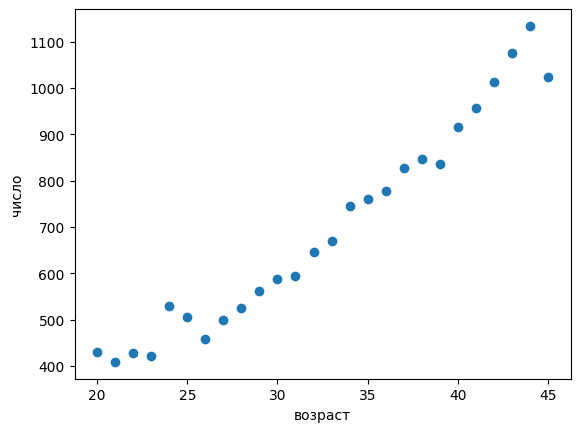

In [4]:
age = [20 + i for i in range(25 +1)]
amount = [431, 409, 429, 422, 530, 505, 459, 499, 526, 563, 587, 595, 647, 
          669, 746, 760, 778, 828, 846, 836, 916, 956, 1014, 1076, 1134, 1024]
plt.scatter(
    age, amount
)
plt.xlabel("возраст")
plt.ylabel("число")

Поскольку задача сводится к минимизации функционала

$G = \Sigma_{k=1}^n(amount[k] - a \cdot age[k] - b)^2$,

Можно расписать необхожимое условие экстремума:

$\frac{\partial G}{\partial a} = 2 \Sigma_{k=1}^n(amount[k] - a \cdot age[k] - b)(-age[k]) = 0$

$\frac{\partial G}{\partial b} = 2 \Sigma_{k=1}^n(amount[k] - a \cdot age[k] - b)(-1) = 0$

Получаем:

$b = \frac{\Sigma_{k=1}^n(amount[k] - a \cdot age[k])}{n} = <amount> - a <age>$, где <age> и <amount> - средние возраст и число соответсвенно

$a = \frac{\Sigma_{k=1}^n amount[k] age[k] - b \cdot age[k]<amount>}{\Sigma_{k=1}^n(age[k]^2-<age>age[k])}$

In [5]:
def LineByMNK(x, y):
    midxy = 0
    midx = sum(x) / len(x)
    midy = sum(y) / len(y)
    midx2 = 0
    for i in range(0, len(x)):
        midxy += (x[i] * y[i])
        midx2 += (x[i] ** 2)
    midxy /= len(x)
    midx2 /= len(x)
    k = (midxy - midx * midy) / (midx2 - midx ** 2)
    b = midy - k * midx
    return k, b

Text(0, 0.5, 'число')

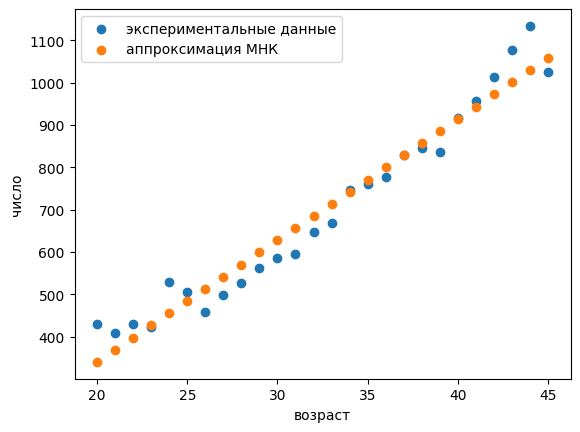

In [6]:
k, b = LineByMNK(age, amount)
plt.scatter(
    age, amount, label = "экспериментальные данные"
)
plt.scatter(
    age, [k * agei + b for agei in age], label = "аппроксимация МНК"
)
plt.legend()
plt.xlabel("возраст")
plt.ylabel("число")

Оценим среднеквадратичное отклонение для k

In [7]:
from math import sqrt
def LineByMNKWithsigma(x, y):
    midxy = 0
    midx = sum(x) / len(x)
    midy = sum(y) / len(y)
    midx2 = 0
    midy2 = 0
    dxx = 0
    dyy = 0
    for i in range(0, len(x)):
        midxy += (x[i] * y[i])
        midx2 += (x[i] ** 2)
        midy2 += (y[i] ** 2)
        dxx += (x[i] - midx) ** 2
        dyy += (y[i] - midy) ** 2
    midxy /= len(x)
    midx2 /= len(x)
    midy2 /= len(x)
    dxx /= len(x)
    dyy /= len(y)
    k = (midxy - midx * midy) / (midx2 - midx ** 2)
    b = midy - k * midx
    return k, b, sqrt((1 / (len(x) -  2)) * (dyy / dxx - k ** 2))
k, b, sigma = LineByMNKWithsigma(age, amount)
sigma

1.268194049341255

И найдём значение функционала ошибки $G$

In [8]:
G = 0
for i in range(len(age)):
    G += (amount[i] - k * age[i] - b) ** 2
G

56451.89675213673

Б) Попробуем применить МНК для участков [20, 28], [28,39], [39, 45] По отдельности

Text(0, 0.5, 'число')

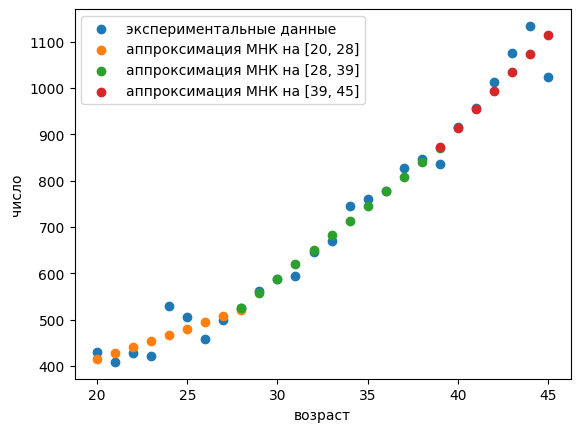

In [78]:
age28 = age[0:9]
amount28 = amount[0:9]
k28, b28 = LineByMNK(age28, amount28)
age39 = age[8:20]
amount39 = amount[8:20]
k39, b39 = LineByMNK(age39, amount39)
age45 = age[19:]
amount45 = amount[19:]
k45, b45 = LineByMNK(age45, amount45)
plt.scatter(
    age, amount, label = "экспериментальные данные"
)
plt.scatter(
    age28, [k28 * agei + b28 for agei in age28], label = "аппроксимация МНК на [20, 28]"
)
plt.scatter(
    age39, [k39 * agei + b39 for agei in age39], label = "аппроксимация МНК на [28, 39]"
)
plt.scatter(
    age45, [k45 * agei + b45 for agei in age45], label = "аппроксимация МНК на [39, 45]"
)
plt.legend()
plt.xlabel("возраст")
plt.ylabel("число")

Можно заметитьБ что значение функционала ошибки стало равно:

In [79]:
G = 0
for i in range(len(age)):
    if age[i] in age28 and age[i] in age39:
        G += ((amount[i] - k28 * age[i] - b28) ** 2 + (amount[i] - k39 * age[i] - b39) ** 2) / 2
        continue
    if age[i] in age45 and age[i] in age39:
        G += ((amount[i] - k45 * age[i] - b45) ** 2 + (amount[i] - k39 * age[i] - b39) ** 2) / 2
        continue
    if age[i] in age28:
        G += (amount[i] - k28 * age[i] - b28) ** 2
    if age[i] in age39:
        G += (amount[i] - k39 * age[i] - b39) ** 2
    if age[i] in age45:
        G += (amount[i] - k45 * age[i] - b45) ** 2
G

25353.82357888415

Получаем уменьшение суммарной ошибки в 2 раза. При этом:

In [80]:
print(k28 * 28 + b28, k39 * 28 + b39)

520.6444444444448 525.8205128205127


In [81]:
print(k39 * 39 + b39, k45 * 39 + b45)

871.0128205128204 873.7142857142857


Получаем Потерю непрерывности в 28 и 39

Г) Попробуем приблизить данную функцию комбинацией 4ёх непрерывных функций, имеющих в указанных точках значения:

In [82]:
amount1 = [(28 - agei) / 8 for agei in age]
for i in range(9, len(age)):
    amount1[i] = 0.0
amount2 = [(agei-20) / 8 for agei in age]
for i in range(8, 20):
    amount2[i] = (39 - age[i]) / 11
for i in range(20, len(age)):
    amount2[i] = 0.0
amount3 = [0] * (25 +1)
for i in range(8, 20):
    amount3[i] = (age[i] - 28) / 11
for i in range(20, 26):
    amount3[i] = (45 - age[i]) / 6
amount4 = [0] * (25 +1)
for i in range(19, 26):
    amount4[i] = (age[i] - 39) / 6

Получаем для функций:

Text(0, 0.5, 'число')

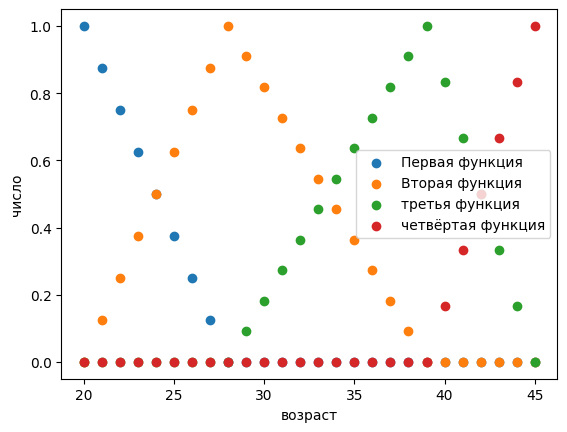

In [83]:
plt.scatter(
    age, amount1, label = "Первая функция"
)
plt.scatter(
    age, amount2, label = "Вторая функция"
)
plt.scatter(
    age, amount3, label = "третья функция"
)
plt.scatter(
    age, amount4, label = "четвёртая функция"
)
plt.legend()
plt.xlabel("возраст")
plt.ylabel("число")

Попробуем найти коэффициенты расписав функционал ошибки $G$ и МиниМизировав его по $\alpha, \beta, \gamma, \delta$:
$\Sigma_{k=1}^n (amount[i] - \alpha amount1[i] - \beta amount2[i] - \gamma amount3[i[ - \delta amount4[i])^2 -> min$

In [84]:
import sympy as mp
G = 0
a, b, g, d = mp.symbols('alpha beta gamma delta')
for i in range(len(age)):
    G += (amount[i] - a * mp.Rational(amount1[i]) - b * mp.Rational(amount2[i]) - g * mp.Rational(amount3[i]) - d * mp.Rational(amount4[i])) ** 2
G

(431 - alpha)**2 + (526 - beta)**2 + (836 - gamma)**2 + (1024 - delta)**2 + (-7*alpha/8 - beta/8 + 409)**2 + (-3*alpha/4 - beta/4 + 429)**2 + (-5*alpha/8 - 3*beta/8 + 422)**2 + (-alpha/2 - beta/2 + 530)**2 + (-3*alpha/8 - 5*beta/8 + 505)**2 + (-alpha/4 - 3*beta/4 + 459)**2 + (-alpha/8 - 7*beta/8 + 499)**2 + (-8188362958855447*beta/9007199254740992 - 3275345183542179*gamma/36028797018963968 + 563)**2 + (-7369526662969903*beta/9007199254740992 - 3275345183542179*gamma/18014398509481984 + 587)**2 + (-3275345183542179*beta/4503599627370496 - 1228254443828317*gamma/4503599627370496 + 595)**2 + (-5731854071198813*beta/9007199254740992 - 3275345183542179*gamma/9007199254740992 + 647)**2 + (-1228254443828317*beta/2251799813685248 - 8188362958855447*gamma/18014398509481984 + 669)**2 + (-8188362958855447*beta/18014398509481984 - 1228254443828317*gamma/2251799813685248 + 746)**2 + (-3275345183542179*beta/9007199254740992 - 5731854071198813*gamma/9007199254740992 + 760)**2 + (-1228254443828317*bet

Необхожимое условие экстремума примет вид:

In [85]:
fir = mp.Eq(mp.diff(G, a), 0)
sec = mp.Eq(mp.diff(G, b), 0)
thi = mp.Eq(mp.diff(G, g), 0)
fou = mp.Eq(mp.diff(G, d), 0)
res = mp.solve([fir, sec, thi, fou], [a, b, g, d])
res

{alpha: 542062223934423214749210149199990149888019202421361316888685370762374745693450795476711170737797398748334/1306247121609995979799477266831778214628195502857593442873607149884789862762798399720547789172264109883,
 beta: 679881985728363191594033609166647255999444149772484609250599712358158753578250536729475763717475095543808/1306247121609995979799477266831778214628195502857593442873607149884789862762798399720547789172264109883,
 delta: 1451385208918003692833817149534064751371786767514713439092044675963280808651325722097402742842315446943744/1306247121609995979799477266831778214628195502857593442873607149884789862762798399720547789172264109883,
 gamma: 1150129035663577565072515297697664073077084026878939157820291014063558781434194492911821471818964560510976/1306247121609995979799477266831778214628195502857593442873607149884789862762798399720547789172264109883}

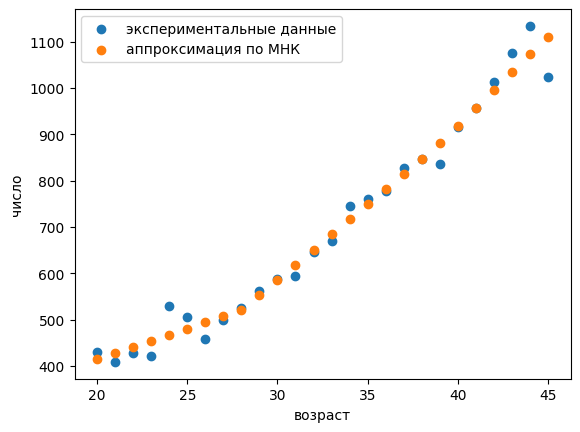

In [88]:
plt.scatter(
    age, amount, label = "экспериментальные данные"
)
plt.scatter(
    age, [res[a] * amount1[i] + res[b] * amount2[i] +
          res[g] * amount3[i] + res[d] * amount4[i] for i in range(len(age))], label = "аппроксимация по МНК"
)
plt.xlabel("возраст")
plt.ylabel("число")
plt.legend()

Посмотрим, насколько точной получилась аппроксимация:

In [87]:
float(G.subs(res))

25092.258476635103

Получаем наиболее точную аппроксимацию при использовании базиса из 4ёх функций